# Upload File

In [1]:
from google.colab import files
files.upload()

Saving housing.csv to housing.csv


{'housing.csv': b'longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity\n-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY\n-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY\n-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY\n-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY\n-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY\n-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY\n-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY\n-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,NEAR BAY\n-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY\n-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY\n-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY\n-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY\n-

# Import Needed Libraries

In [2]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 74.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ef064c59856c6c82291237b922f4fd0b7e9e649522cf5fd6b13f0a2c62932bb1
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from ydata_profiling import ProfileReport
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [4]:
df= pd.read_csv('housing.csv')
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

# Proceeses On Data

In [5]:
le= LabelEncoder()
df['ocean_proximity']= le.fit_transform(df['ocean_proximity'])
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_proximity  
0       322.0       126.0         8.3252            452600.0                3  
1      2401.0      1138.0         8.3014            358500.0                3  
2       496.0       177.0         7.2574            352100.0                3  
3       558.0       219.0         5.6431            341300.0                3  
4       565.0       259.0         3.8462            342200.0                3

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Visualization

In [8]:
profile = ProfileReport(df, title="Housing Profile Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df['ocean_proximity_original'] = le.inverse_transform(df['ocean_proximity'])

fig = px.scatter_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    color="ocean_proximity_original",
    height=600
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()





# Fit Models

In [10]:
df.drop(['ocean_proximity_original'], axis=1, inplace=True)
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_proximity  
0       322.0       126.0         8.3252            452600.0                3  
1      2401.0      1138.0         8.3014            358500.0                3  
2       496.0       177.0         7.2574            352100.0                3  
3       558.0       219.0         5.6431            341300.0                3  
4       565.0       259.0         3.8462            342200.0                3

In [11]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
x_scaler= StandardScaler()
X_train= x_scaler.fit_transform(X_train)
X_test= x_scaler.transform(X_test)

In [14]:
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred_lr = lr.predict(X_test)

# Evaluate Models

In [16]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

In [17]:
mse_lr, mae_lr, r2_lr = evaluate_model(y_test, y_pred_lr)

In [18]:
print("Linear Regression:")
print(f"Mean Squared Error: {mse_lr}")
print(f"Mean Absolute Error: {mae_lr}")
print(f"R-Squared: {r2_lr}\n")

Linear Regression:
Mean Squared Error: 5055025116.165613
Mean Absolute Error: 51846.87784903815
R-Squared: 0.6142406531011786



<ipython-input-19-8c878d8d78ca>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-19-8c878d8d78ca>:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



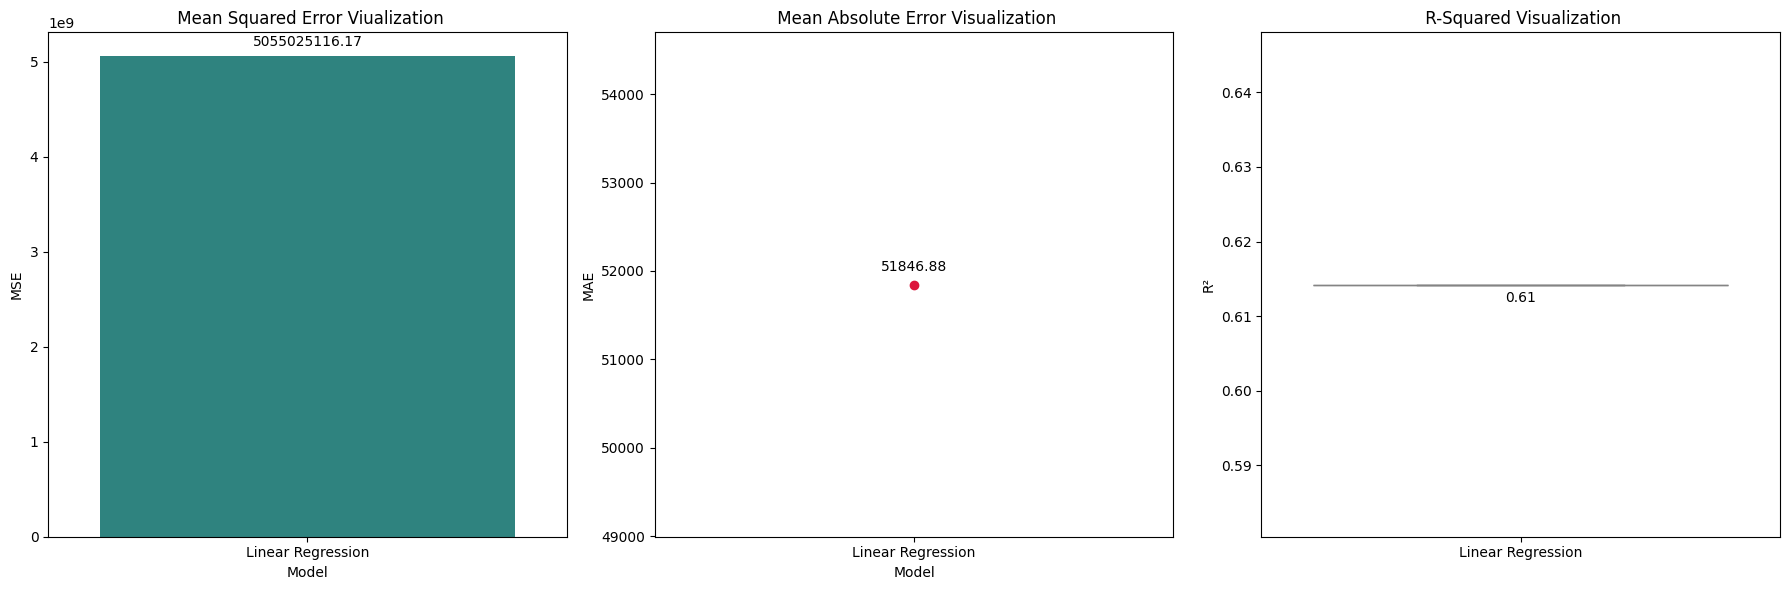

In [19]:
metrics = ['Mean Squared Error', 'Mean Absolute Error', 'R-Squared']
linear_values = [mse_lr, mae_lr, r2_lr]


fig, axs = plt.subplots(1, 3, figsize=(18, 6))


sns.barplot(ax=axs[0], x=['Linear Regression'], y=[mse_lr], palette='viridis')
axs[0].set_title(' Mean Squared Error Viualization')
axs[0].set_ylabel('MSE')
axs[0].set_xlabel('Model')
for bar in axs[0].containers[0]:
    axs[0].annotate(f'{bar.get_height():.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    xytext=(0, 5), textcoords="offset points", ha='center', va='bottom')


axs[1].plot(['Linear Regression'], [mae_lr], marker='o', linestyle='-', color='crimson')
axs[1].set_title(' Mean Absolute Error Visualization')
axs[1].set_ylabel('MAE')
axs[1].set_xlabel('Model')
for i, val in enumerate([mae_lr]):
    axs[1].annotate(f'{val:.2f}', xy=(i, val), xytext=(0, 10), textcoords='offset points', ha='center')


sns.boxplot(ax=axs[2], data=[[r2_lr]], palette='coolwarm')
axs[2].set_xticklabels(['Linear Regression'])
axs[2].set_title(' R-Squared Visualization')
axs[2].set_ylabel('R²')
for i, val in enumerate([r2_lr]):
    axs[2].annotate(f'{val:.2f}', xy=(i, val), xytext=(0, -15), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()
